In [99]:
#Import libraries
import pandas as pd # Data preprocessing
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Data Visualization
import missingno as msno #Missing data - Data Visualization
from collections import Counter# Counting
import numpy as np
from datetime import datetime
import datetime as dt

In [101]:
# Data pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [103]:
# Classifier Libraries
import sklearn
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [105]:
# !pip install xgboost
from xgboost import XGBClassifier  # Corrected capitalization
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [107]:
# Evaluation metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
)


In [109]:
import warnings
warnings.filterwarnings("ignore")

In [111]:
# Load the data set
df = pd.read_csv(r"C:\Users\renef\Downloads\Dataset_ecommerce.csv")
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [112]:
# Dimensionality of the data - The number of rows and columns
df.shape

(541909, 8)

In [115]:
# Examine the columns/features of the data
df.columns

Index(['InvoiceNo', 'InvoiceDate', 'CustomerID', 'StockCode', 'Description',
       'Quantity', 'UnitPrice', 'Country'],
      dtype='object')

In [117]:
# Investigate the dataset for annomalies and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   InvoiceDate  541909 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    541909 non-null  object 
 4   Description  541909 non-null  object 
 5   Quantity     541909 non-null  int64  
 6   UnitPrice    541909 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [119]:
# Numerical Statistical Analysis
df.describe()

,CustomerID,Quantity,UnitPrice
count,406829.000000,541909.000000,541909.000000
mean,15287.690570,50.534748,50.476354
std,1713.600303,28.849367,28.564775
min,12346.000000,1.000000,1.000000
25%,13953.000000,26.000000,25.750000
50%,15152.000000,51.000000,50.430000
75%,16791.000000,76.000000,75.180000
max,18287.000000,100.000000,100.000000


In [121]:
# Categorical Statistical Analysis
df.describe(include=["object","bool"])

,InvoiceNo,InvoiceDate,StockCode,Description,Country
count,541909,541909,541909,541909,541909
unique,25900,23260,9000,10,28
top,573585,2011-10-31 14:41:00,SC2014,Sports Equipment,Cote d'Ivoire
freq,1114,1114,96,54765,19651


In [122]:
# another way to look at it
df.describe(include = "all")

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
count,541909,541909,406829.000000,541909,541909,541909.000000,541909.000000,541909
unique,25900,23260,NaN,9000,10,NaN,NaN,28
top,573585,2011-10-31 14:41:00,NaN,SC2014,Sports Equipment,NaN,NaN,Cote d'Ivoire
freq,1114,1114,NaN,96,54765,NaN,NaN,19651
mean,NaN,NaN,15287.690570,NaN,NaN,50.534748,50.476354,NaN
std,NaN,NaN,1713.600303,NaN,NaN,28.849367,28.564775,NaN
min,NaN,NaN,12346.000000,NaN,NaN,1.000000,1.000000,NaN
25%,NaN,NaN,13953.000000,NaN,NaN,26.000000,25.750000,NaN
50%,NaN,NaN,15152.000000,NaN,NaN,51.000000,50.430000,NaN
75%,NaN,NaN,16791.000000,NaN,NaN,76.000000,75.180000,NaN


Dealing with missing data-

1.MCAR(Missing completely at random): These are values that are randomly missing and do not depend on any other values. 2. MAR(Missing at random): These values are dependent on some additional features 3.MNAR(Missing not at random): There is a reason behind why these values are missing.

There are several methods for imputing data, including the measure of Central Tendency , regression imputation, and multiple imputation. measure of Central Tendency involves replacing missing values with either the Mean , Median, and Mode of the variable, while regression imputation involves using other variables in the dataset to predict missing values.

In [125]:
# Investigate the missing data
null_vals = df.isnull().sum()
null_vals

InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

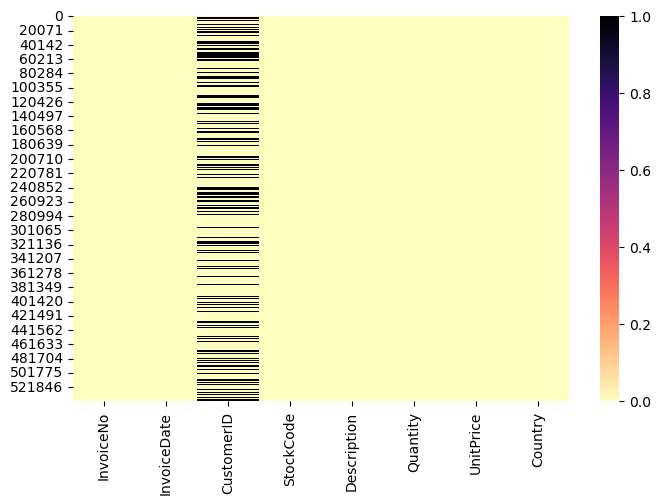

In [127]:
# Visualize the missing data
plt.figure(figsize = (8,5))
sns.heatmap(df.isnull(), cbar=True, cmap="magma_r");

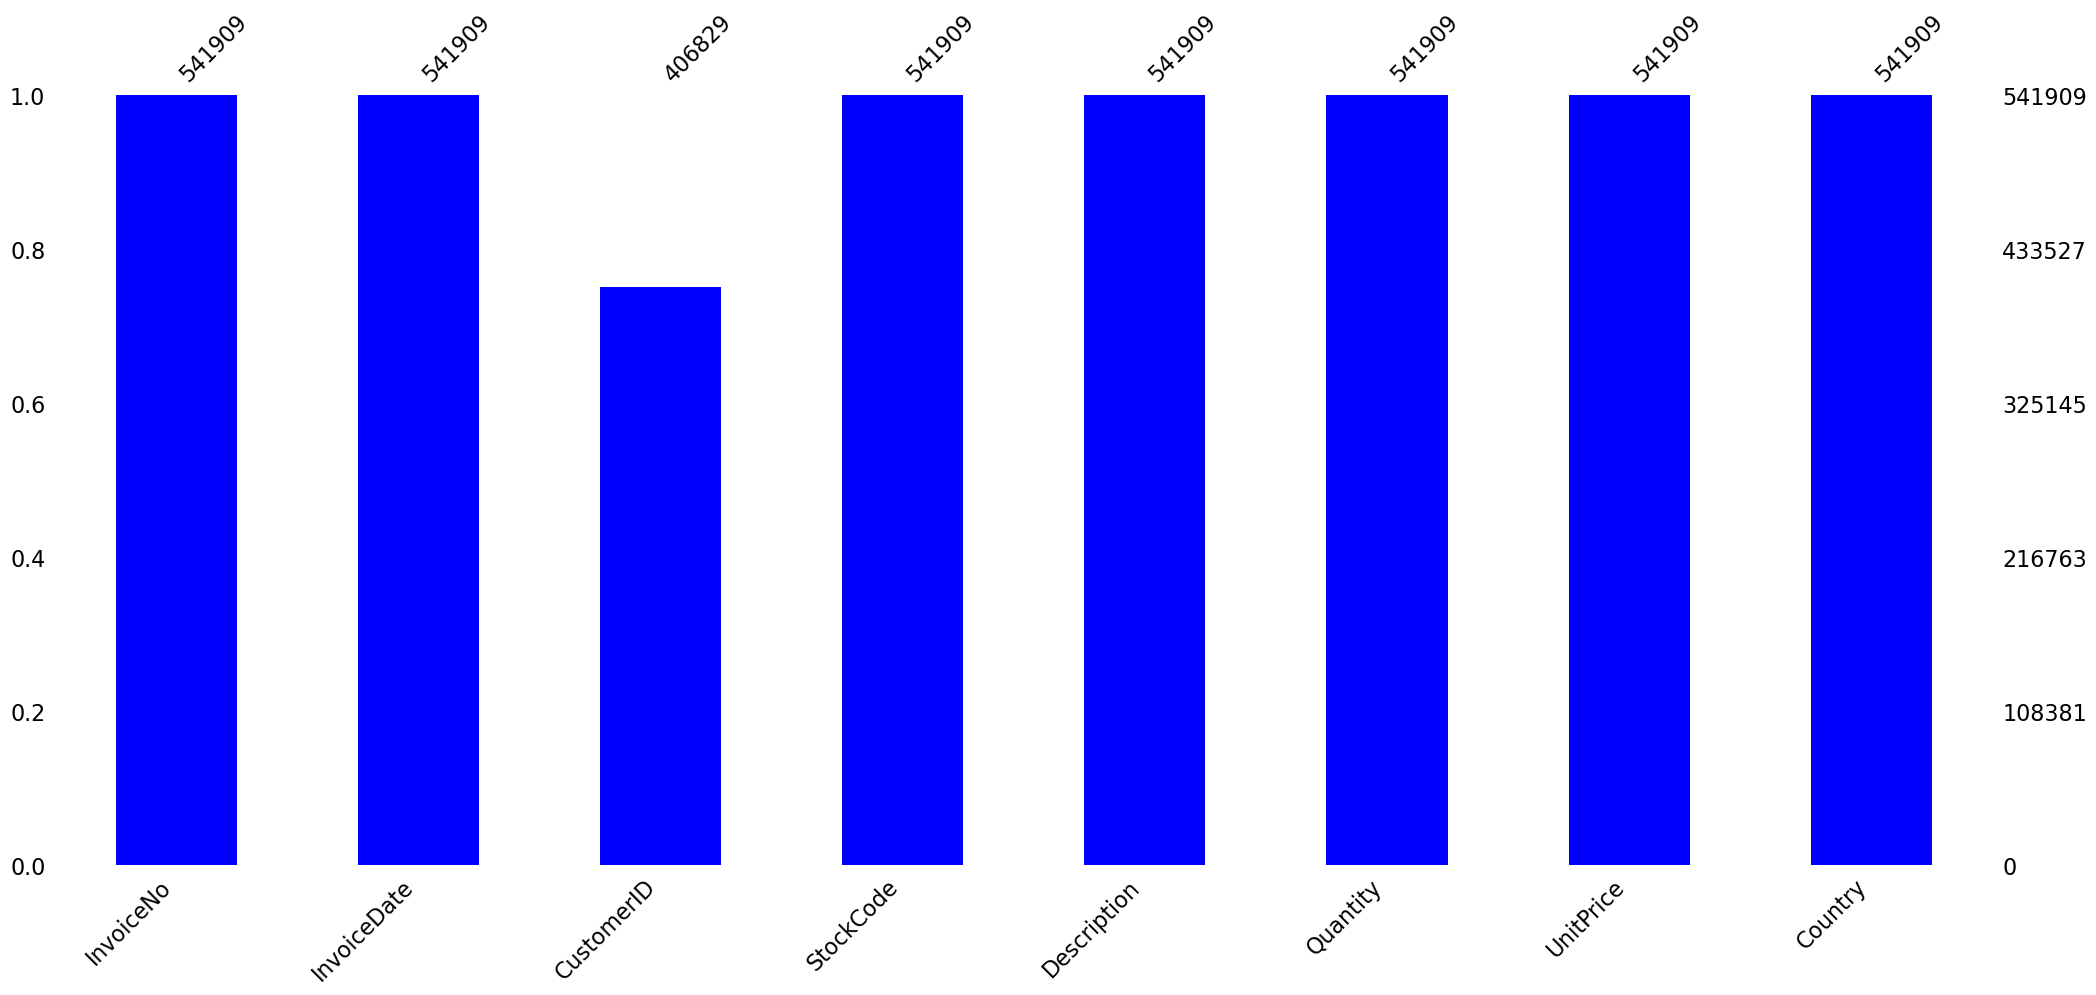

In [129]:
msno.bar(df, color="blue");

In [130]:
# Display where the missing data exist in the data
df[df.isnull().any(axis=1)]

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
622,536414,2010-12-01 11:52:00,NaN,SC7308,Kitchenware,93,62.55,Senegal
1443,536544,2010-12-01 14:32:00,NaN,SC3127,Toys,86,22.90,Burkina Faso
1444,536544,2010-12-01 14:32:00,NaN,SC3641,Kitchenware,7,72.45,Nigeria
1445,536544,2010-12-01 14:32:00,NaN,SC5252,Cosmetics,39,32.46,Ghana
1446,536544,2010-12-01 14:32:00,NaN,SC1375,Toys,39,3.12,South Africa
...,...,...,...,...,...,...,...,...
541536,581498,2011-12-09 10:26:00,NaN,SC9154,Toys,7,15.07,Libya
541537,581498,2011-12-09 10:26:00,NaN,SC8504,Cloths,35,43.48,Ethiopia
541538,581498,2011-12-09 10:26:00,NaN,SC5771,Electronics,82,88.05,Morocco
541539,581498,2011-12-09 10:26:00,NaN,SC7557,Kitchenware,75,91.56,Togo


In [131]:
# Drop the missing data
df.dropna(inplace=True)

In [132]:
df.isnull().sum()

InvoiceNo      0
InvoiceDate    0
CustomerID     0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
Country        0
dtype: int64

In [133]:
# Datatime Analysis
df.head()


,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [134]:
# Convert the date column into a pandas datetime object
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   InvoiceDate  406829 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  float64       
 3   StockCode    406829 non-null  object        
 4   Description  406829 non-null  object        
 5   Quantity     406829 non-null  int64         
 6   UnitPrice    406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


Exploratory data analysis

Analysis by country

In [137]:
# Examine the columns/features of the data
df.columns

Index(['InvoiceNo', 'InvoiceDate', 'CustomerID', 'StockCode', 'Description',
       'Quantity', 'UnitPrice', 'Country'],
      dtype='object')

In [138]:
quantity_by_country = df.groupby(["Country"])["Quantity"].sum().reset_index()


In [139]:
# Arranging in ascending order
quantity_by_country = quantity_by_country.sort_values("Quantity", ascending = False).reset_index()


In [140]:
quantity_by_country

,index,Country,Quantity
0,23,Togo,741223
1,20,South Africa,740589
2,4,Cote d'Ivoire,740229
3,15,Nigeria,739708
4,9,Libya,739206
5,1,Benin,738133
6,27,Zimbabwe,737522
7,19,Somalia,736219
8,0,Algeria,736181
9,18,Sierra Leone,735477


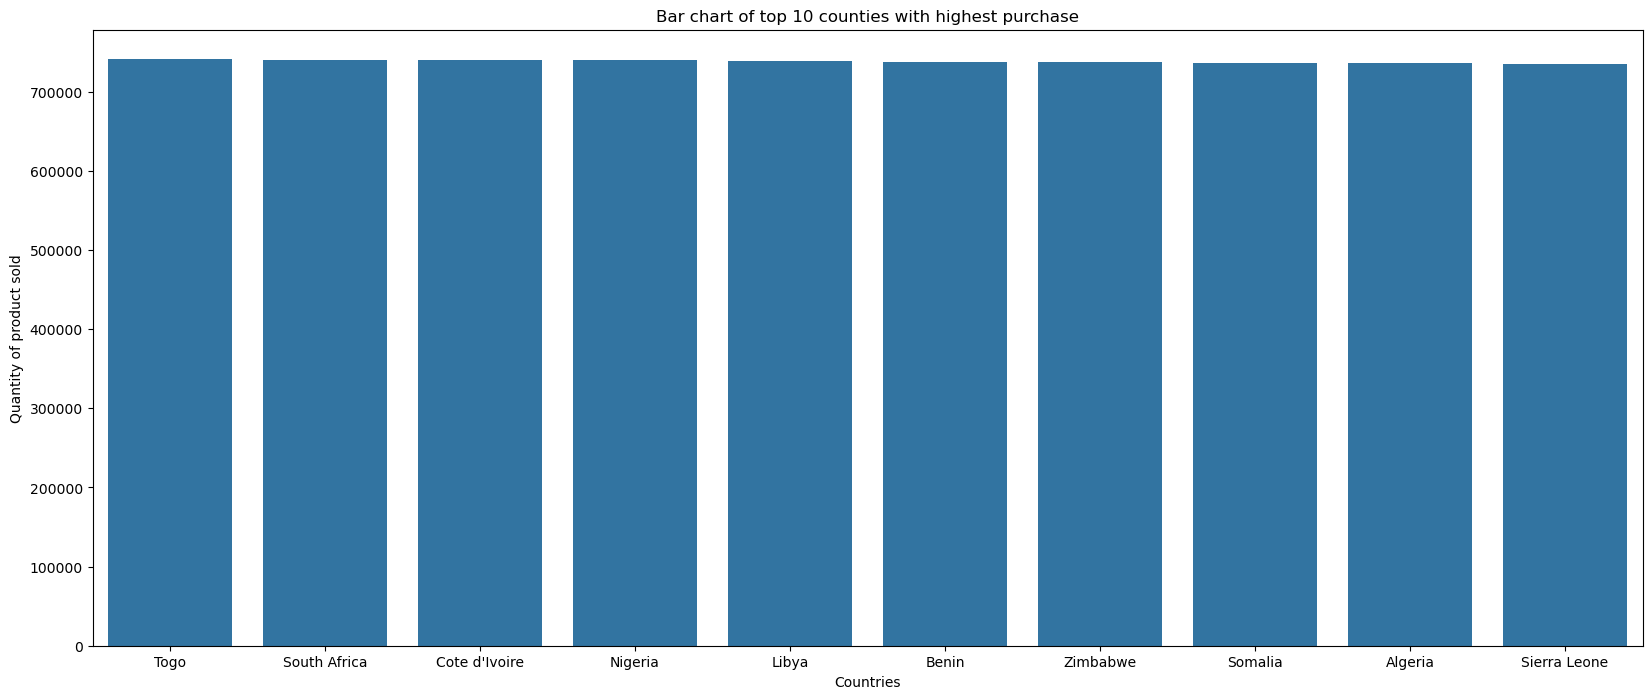

In [141]:
# Visualise top countries where most pruduct are sold
top_10_country = quantity_by_country.head(10)

plt.figure(figsize = (20,8))
ax = sns.barplot(x = "Country", y = "Quantity", data = top_10_country)

plt.xlabel("Countries")
plt.ylabel("Quantity of product sold")
plt.title("Bar chart of top 10 counties with highest purchase")
plt.show()

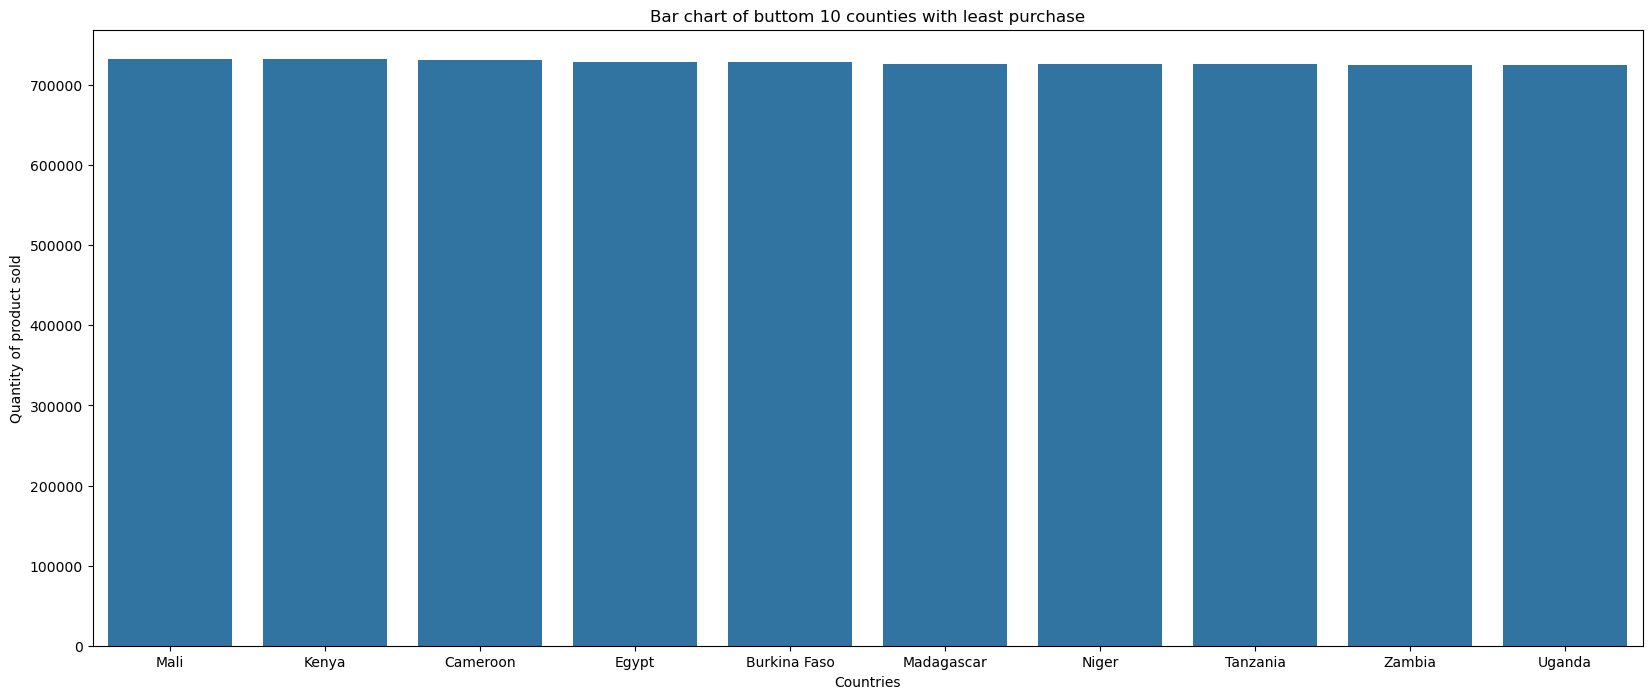

In [142]:
# Visualise top countries where least number pruduct are sold
least_10_country = quantity_by_country.tail(10)

plt.figure(figsize = (20,8))
ax = sns.barplot(x = "Country", y = "Quantity", data = least_10_country)

plt.xlabel("Countries")
plt.ylabel("Quantity of product sold")
plt.title("Bar chart of buttom 10 counties with least purchase")
plt.show()

ANALYSIS OF COUNTRY AND NUMBER OF CUSTOMERS

In [144]:
country_to_customer = df.groupby(["Country"])["CustomerID"].nunique().reset_index()

In [145]:
# Arranging in ascending order
country_to_customer = country_to_customer.sort_values("CustomerID", ascending = False).reset_index()


In [146]:
country_to_customer

,index,Country,CustomerID
0,13,Mozambique,3072
1,1,Benin,3054
2,23,Togo,3053
3,15,Nigeria,3051
4,2,Burkina Faso,3049
5,18,Sierra Leone,3046
6,11,Mali,3044
7,0,Algeria,3043
8,17,Senegal,3040
9,14,Niger,3039


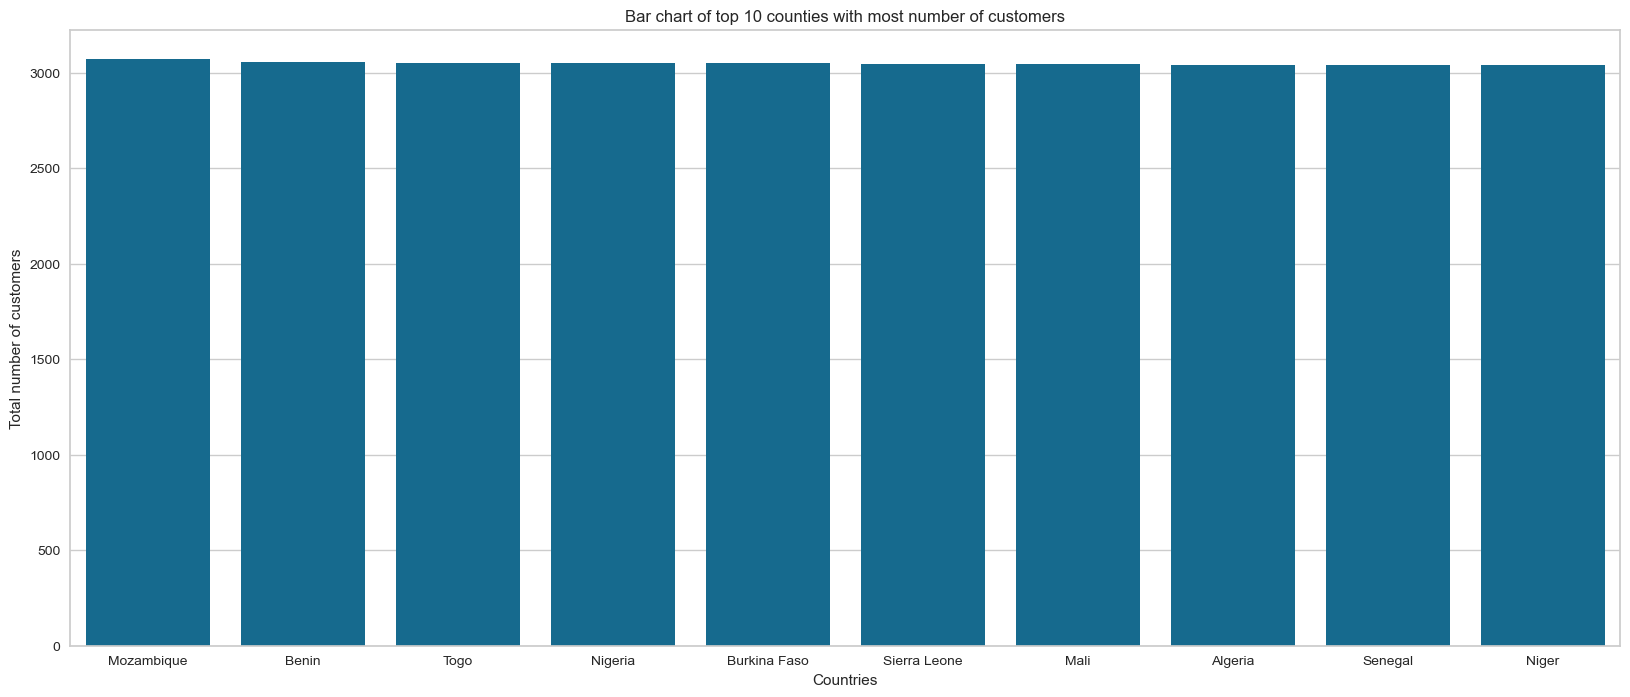

In [362]:
# Draw the plot of top 10countries with most number of customers
# Visualise top countries where most pruduct are sold
top_countries_to_customer = country_to_customer.head(10)

plt.figure(figsize = (20,8))
ax = sns.barplot(x = "Country", y = "CustomerID", data = top_countries_to_customer)

plt.xlabel("Countries")
plt.ylabel("Total number of customers")
plt.title("Bar chart of top 10 counties with most number of customers")
plt.show()

### NARRATION, OBSERVATION, CONCLUSION

Based on the provided bar charts, here are the observations, narrative, and conclusions:

Observations:
Top 10 Countries with the Highest Purchases:

The chart indicates a consistent and high quantity of products sold across the top 10 countries, including Togo, South Africa, Côte d'Ivoire, Nigeria, Libya, Benin, Zimbabwe, Somalia, Algeria, and Sierra Leone.
All these countries appear to have very close purchase quantities, suggesting similar market dynamics or purchasing patterns in these regions.
Bottom 10 Countries with the Least Purchases:

Countries such as Mali, Kenya, Cameroon, Egypt, Burkina Faso, Madagascar, Niger, Tanzania, Zambia, and Uganda are at the lower end in terms of purchase quantities.
Similar to the first chart, the quantities in this group are relatively close to each other, indicating uniformity in lower purchase volumes.
Top 10 Countries with the Most Customers:

Countries like Mozambique, Benin, Togo, Nigeria, Burkina Faso, Sierra Leone, Mali, Algeria, Senegal, and Niger have the highest number of customers.
Despite having many customers, the correlation between customer count and purchase volume is unclear. For example, countries like Mozambique and Benin are present here but may not reflect in the highest purchase category.
Narrative:
The charts provide a detailed view of purchase behavior and customer distribution across various countries. The first chart highlights regions with significant purchasing activity, likely due to higher population density, economic stability, or stronger market penetration by the products. The second chart shows countries where purchasing is less significant, potentially indicating limited market presence or economic challenges.

The third chart focuses on customer base distribution, highlighting countries with a large customer count. This does not necessarily align with purchase volumes, suggesting differences in per-customer purchasing capacity or product availability.

Conclusion:
There is a strong market in countries like Togo, South Africa, Côte d'Ivoire, and Nigeria, which can be further explored for expanding business operations.
For countries with lower purchases but higher customer counts (e.g., Mozambique), strategies can be developed to increase average purchase per customer.
For countries with low customer counts and low purchase volumes, like Uganda or Madagascar, targeted marketing campaigns or partnerships could be implemented to boost market penetration.









In [ ]:
SALES TREND VISUALIZATION


In [166]:
monthly_sales = df.groupby(df["InvoiceDate"].dt.to_period("M"))["Quantity"].sum()

In [168]:
monthly_sales

InvoiceDate
2010-12    1350834
2011-01    1105886
2011-02    1033468
2011-03    1406617
2011-04    1175052
2011-05    1459981
2011-06    1402857
2011-07    1388119
2011-08    1387695
2011-09    2061181
2011-10    2559609
2011-11    3313177
2011-12     891630
Freq: M, Name: Quantity, dtype: int64

#create a_line plot
plt.figure(figsize = (20,10))
plt.plot(monthly_sales.index.strftime("%y-%m"), monthly_sales.values, marker ="o", linestyle = "-")
plt.xlabel("month")
plt.ylabel("total sales")
plt.title("monthly sales trend")
plt.grid(True)
plt.show()


NARRATION AND OBSERVATION ON SALES VISUALIZATION


Observation:
Seasonal Trend:

The monthly sales trend shows fluctuations throughout the observed period (2010-12 to 2011-12).
The highest sales occurred in November 2011 (3,313,177 units), followed by October 2011 (2,559,609 units) and September 2011 (2,061,181 units). This suggests a significant seasonal or end-of-year demand spike.
December 2011 shows a sharp decline (891,630 units), which could indicate a post-peak sales drop after the November surge.
Overall Growth Pattern:

There is an increasing trend in sales leading up to the peak in November 2011, showing strong growth over the year.
Earlier months, such as January and February 2011, had lower sales compared to mid and late 2011, indicating potential business expansion, better market penetration, or seasonal effects.
Plateaus and Stability:

Between February and August 2011, sales show relative stability, hovering between 1,000,000 and 1,400,000 units monthly.
A consistent demand pattern in this period may reflect a stable customer base or recurring purchasing behavior.
Narrative:
The line plot illustrates a clear monthly sales trend over a year, showcasing significant seasonality in demand. The sharp rise in September through November could be linked to holiday season preparation, promotions, or other market dynamics. The steep drop in December might reflect the exhaustion of demand post-November or logistical issues like stockouts.

The lower sales in the early part of the year suggest a slow season, which contrasts with the latter half's growth. It appears that the business gains momentum over the year, possibly due to strategic interventions or seasonal demand.

Analysis and Recommendations:
Seasonal Demand Planning:

The spike in September to November indicates a critical period for sales. The company should focus on inventory management, marketing campaigns, and logistics optimization to capitalize on this peak demand.
Post-Peak Strategy:

The significant drop in December highlights the need for strategies to sustain demand after the peak, such as targeted promotions or product bundling.
Sales Optimization in Low Months:

The relatively low sales in early months (e.g., January and February) suggest an opportunity to boost demand through discounts, special campaigns, or customer engagement initiatives.
Growth Opportunities:

The increasing trend leading to November suggests room for growth. Expanding the customer base, introducing new products, or enhancing regional penetration during this period could maximize returns.
Data Exploration:

Further investigation is needed to understand the underlying causes of sales trends (e.g., seasonal, economic, or operational factors). Additional segmentation by product category, customer demographics, or regions could provide actionable insights.
This analysis highlights the importance of leveraging historical data to align business operations and marketing strategies with seasonal trends.








COHORT ANALYSIS

In [173]:
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [175]:
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

In [177]:
df["InvoiceDate"] = df["InvoiceDate"].apply(get_month)

In [181]:
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda


In [183]:
def get_cohort_date(df):
    df["cohort date"] = df.groupby("CustomerID")["InvoiceDate"].transform("min")
    return df["cohort date"]

In [187]:
df["cohort date"] = get_cohort_date(df)

In [189]:
df

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,cohort date
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12-01
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12-01
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,2010-12-01
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12-01
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12-01
...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-01,12680.0,SC5440,Furniture,25,36.53,Mozambique,2011-08-01
541905,581587,2011-12-01,12680.0,SC3576,Cloths,94,90.65,Tunisia,2011-08-01
541906,581587,2011-12-01,12680.0,SC5283,Furniture,14,40.07,Somalia,2011-08-01
541907,581587,2011-12-01,12680.0,SC1099,Cosmetics,45,79.83,Senegal,2011-08-01


In [314]:
# Calculate the sales column
df["SalePrice"] = df["Quantity"]*df["UnitPrice"]


df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,cohort date,cohort_index,SalePrice
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12-01,1,664.95
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12-01,1,1862.95
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,2010-12-01,1,4796.22
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12-01,1,370.95
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12-01,1,1941.50


Create a pivot table



To create a pivot table, first we need to know how many customers made a purchase each month after their first purchase

for example: How many customers from the September cohort made a purchase four months after their initial purchase in September?





In [320]:
# Group the DataFrame by the CustomerID column
customer_data = df.groupby(["Country","CustomerID"])

# Calculate the total sales, order count, and average order value for each customer
total_sales = customer_data["SalePrice"].sum()
order_count = customer_data["InvoiceDate"].size()
avg_order_value = total_sales / order_count

# Create a new DataFrame with the aggregated results
results = pd.DataFrame({
    "TotalSales": total_sales,
    "OrderCount": order_count,
    "AvgOrderValue": avg_order_value
})

# Print the results
results.tail(10)

TotalSales  OrderCount  AvgOrderValue
Country  CustomerID                                       
Zimbabwe 18252.0       14990.52           8    1873.815000
         18257.0        5839.33           2    2919.665000
         18259.0        8699.08           2    4349.540000
         18260.0        2434.62           3     811.540000
         18263.0        7162.27           3    2387.423333
         18265.0        1286.88           1    1286.880000
         18272.0       10964.62           4    2741.155000
         18274.0        9490.96           3    3163.653333
         18283.0       55417.95          18    3078.775000
         18287.0        9066.19           3    3022.063333

In [322]:
results.shape

(84912, 3)

<Axes: xlabel='TotalSales', ylabel='Count'>

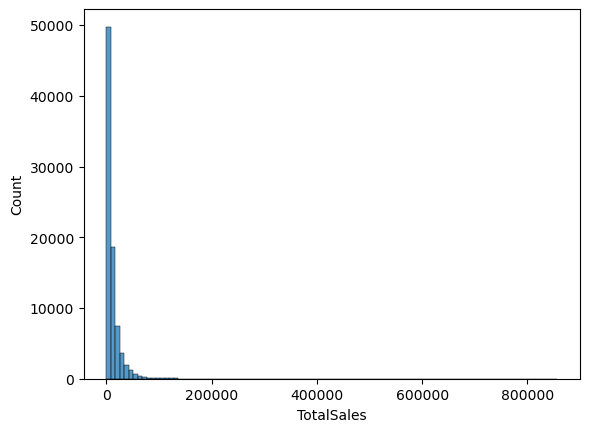

In [326]:
#visualize the distribution of the total sales feature
sns.histplot(results['TotalSales'],bins=100)
#plt.xscale('log');

Cohort index

In [196]:
# Cohort index(telling us how far away from the nect purchace)
def get_year_and_month(df, col):
    month = df[col].dt.month
    year = df[col].dt.year
    return month,year

In [198]:
first_month, first_year = get_year_and_month(df, "cohort date")

In [201]:
first_month

0         12
1         12
2         12
3         12
4         12
          ..
541904     8
541905     8
541906     8
541907     8
541908     8
Name: cohort date, Length: 406829, dtype: int32

In [203]:
first_year

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
541904    2011
541905    2011
541906    2011
541907    2011
541908    2011
Name: cohort date, Length: 406829, dtype: int32

In [205]:
latest_month, latest_year = get_year_and_month(df,"InvoiceDate")

In [207]:
latest_month

0         12
1         12
2         12
3         12
4         12
          ..
541904    12
541905    12
541906    12
541907    12
541908    12
Name: InvoiceDate, Length: 406829, dtype: int32

In [209]:
latest_year

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
541904    2011
541905    2011
541906    2011
541907    2011
541908    2011
Name: InvoiceDate, Length: 406829, dtype: int32

***cohort index***

In [216]:
def create_cohort_index(first_month, first_year, latest_month, latest_year):
     year_diff = latest_year - first_year
     month_diff = latest_month - first_month
     index = year_diff*12 + month_diff +1
     return index
    


In [218]:
df["cohort_index"] = create_cohort_index(first_month,first_year, latest_month, latest_year)

In [220]:
df

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,cohort date,cohort_index
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12-01,1
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12-01,1
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,2010-12-01,1
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12-01,1
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12-01,1
...,...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-01,12680.0,SC5440,Furniture,25,36.53,Mozambique,2011-08-01,5
541905,581587,2011-12-01,12680.0,SC3576,Cloths,94,90.65,Tunisia,2011-08-01,5
541906,581587,2011-12-01,12680.0,SC5283,Furniture,14,40.07,Somalia,2011-08-01,5
541907,581587,2011-12-01,12680.0,SC1099,Cosmetics,45,79.83,Senegal,2011-08-01,5


COHORT TABLE

In [223]:
cohort_info = df.groupby(["cohort date", "cohort_index"])["CustomerID"].nunique().reset_index()

In [225]:
cohort_info

,cohort date,cohort_index,CustomerID
0,2010-12-01,1,948
1,2010-12-01,2,362
2,2010-12-01,3,317
3,2010-12-01,4,367
4,2010-12-01,5,341
...,...,...,...
86,2011-10-01,2,93
87,2011-10-01,3,46
88,2011-11-01,1,321
89,2011-11-01,2,43


In [229]:
cohort_info.rename(columns = {"CustomerID" :"Number of customers"}, inplace = True)

In [232]:
cohort_info

,cohort date,cohort_index,Number of customers
0,2010-12-01,1,948
1,2010-12-01,2,362
2,2010-12-01,3,317
3,2010-12-01,4,367
4,2010-12-01,5,341
...,...,...,...
86,2011-10-01,2,93
87,2011-10-01,3,46
88,2011-11-01,1,321
89,2011-11-01,2,43


In [240]:
cohort_table = cohort_info.pivot(index = "cohort date", columns = ["cohort_index"], values = "Number of customers")
cohort_table.index = cohort_table.index.strftime("%B %Y")

In [242]:
cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort date,,,,,,,,,,,,,
December 2010,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
January 2011,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
February 2011,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
March 2011,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
April 2011,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
May 2011,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
June 2011,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


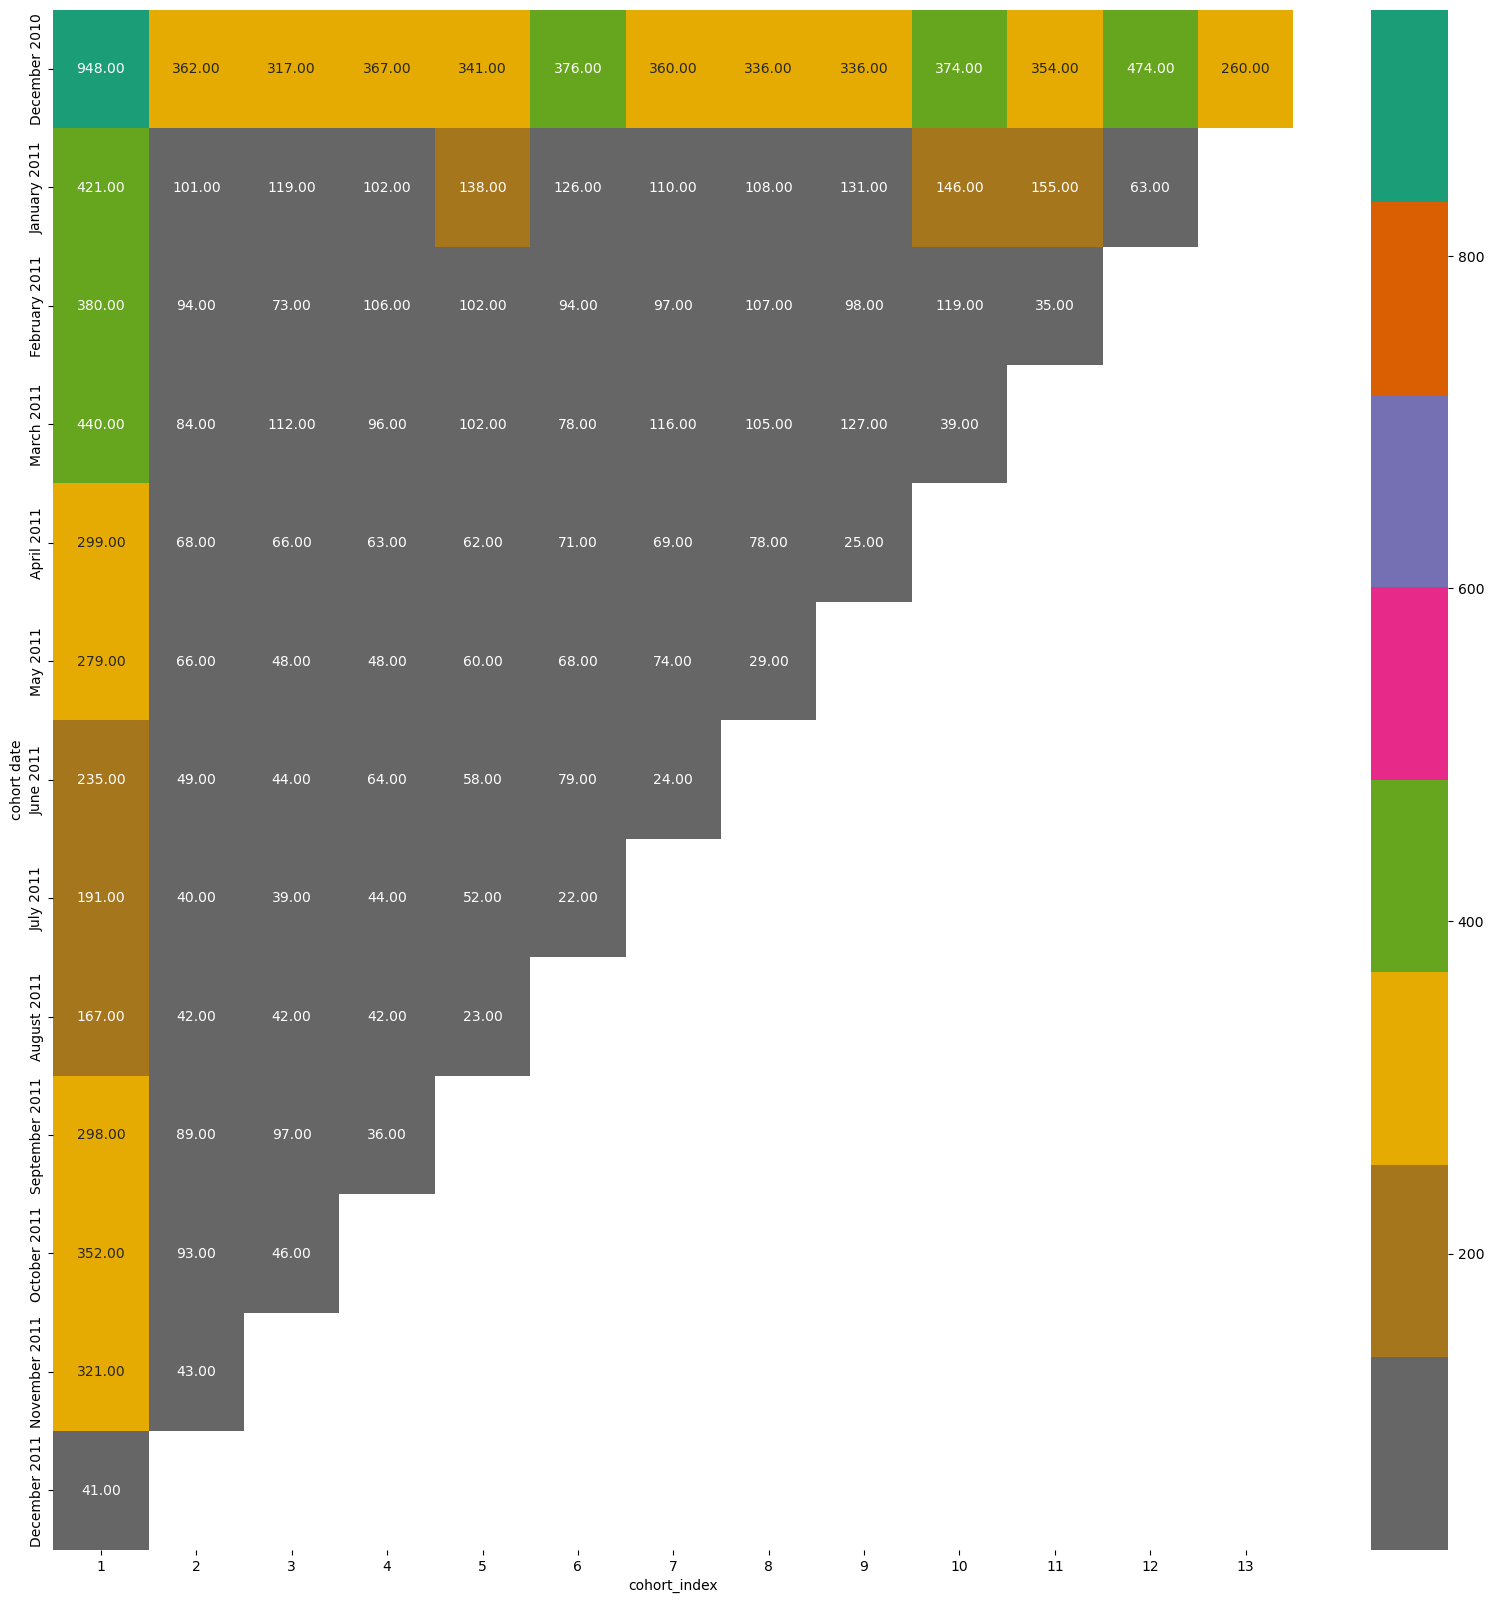

In [254]:
plt.figure(figsize = (20,20))
sns.heatmap(cohort_table, annot = True, cmap = "Dark2_r", fmt = ".2f");

NARRATION AND OBSERVATION OF THE COHORT INDEX


Cohorts and Time Periods:

Each row represents a cohort (e.g., "December 2010 cohort" or "January 2011 cohort").
Columns (labeled as cohort_index) indicate the period (e.g., month 1, month 2, etc.) since the cohort started.
Retention or Metric Decline:

The metric (e.g., number of users, revenue, engagement) typically starts higher in the first column for most cohorts and gradually declines over time.
The darker cells indicate stronger retention or performance, while lighter or missing cells signify a drop-off.
Insights from the Data:

Initial cohort sizes are larger in earlier cohorts (e.g., December 2010 and January 2011) compared to later cohorts (e.g., July 2011 and beyond).
There is a visible decline in performance or retention across most cohorts after the first few periods, which is common in such analyses.
Narration:
This heatmap provides an overview of performance trends over time, focusing on cohort retention or other key metrics. Early cohorts (like December 2010 and January 2011) tend to start with high values, suggesting a larger base or better engagement initially. However, as we move down to more recent cohorts, the starting value is lower, possibly indicating a shrinking user base, declining engagement, or market saturation.

The metric tends to decline consistently after the first period, highlighting challenges in maintaining user engagement or retention over time. For example:

The December 2010 cohort began with a value of 948 but dropped significantly by the 5th period.
Similar trends are observed for the subsequent cohorts, with most metrics tapering off as time progresses.
Observations and Recommendations:
Retention Challenge:

A steep decline in values across most cohorts after the first period indicates a need for improved retention strategies, such as personalized user experiences, targeted campaigns, or enhanced onboarding.
Performance Decrease in Later Cohorts:

Later cohorts (e.g., July 2011 and beyond) show lower initial metrics, which could be due to reduced marketing efforts, lower user acquisition, or decreased overall interest.
Focus on Early Interventions:

Since the first period always shows the highest activity, management should consider strategies that extend this engagement, such as loyalty programs, discounts, or user incentives.
Investigate Drop-Off Causes:

Explore why the metric declines sharply after the first few periods. This might involve examining product features, user feedback, or external competition.
Reassess Acquisition Strategies:

The declining initial values for newer cohorts suggest the need for fresh marketing approaches to expand the user base.
This analysis provides a framework for understanding retention trends and identifying opportunities for growth and engagement improvement. Would you like additional insights or specific actions tailored to these findings?








In [263]:
new_cohort_table = cohort_table.divide(cohort_table.iloc[:, 0], axis=0)

                                       

In [265]:
new_cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort date,,,,,,,,,,,,,
December 2010,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
January 2011,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
February 2011,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
March 2011,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
April 2011,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
May 2011,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
June 2011,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


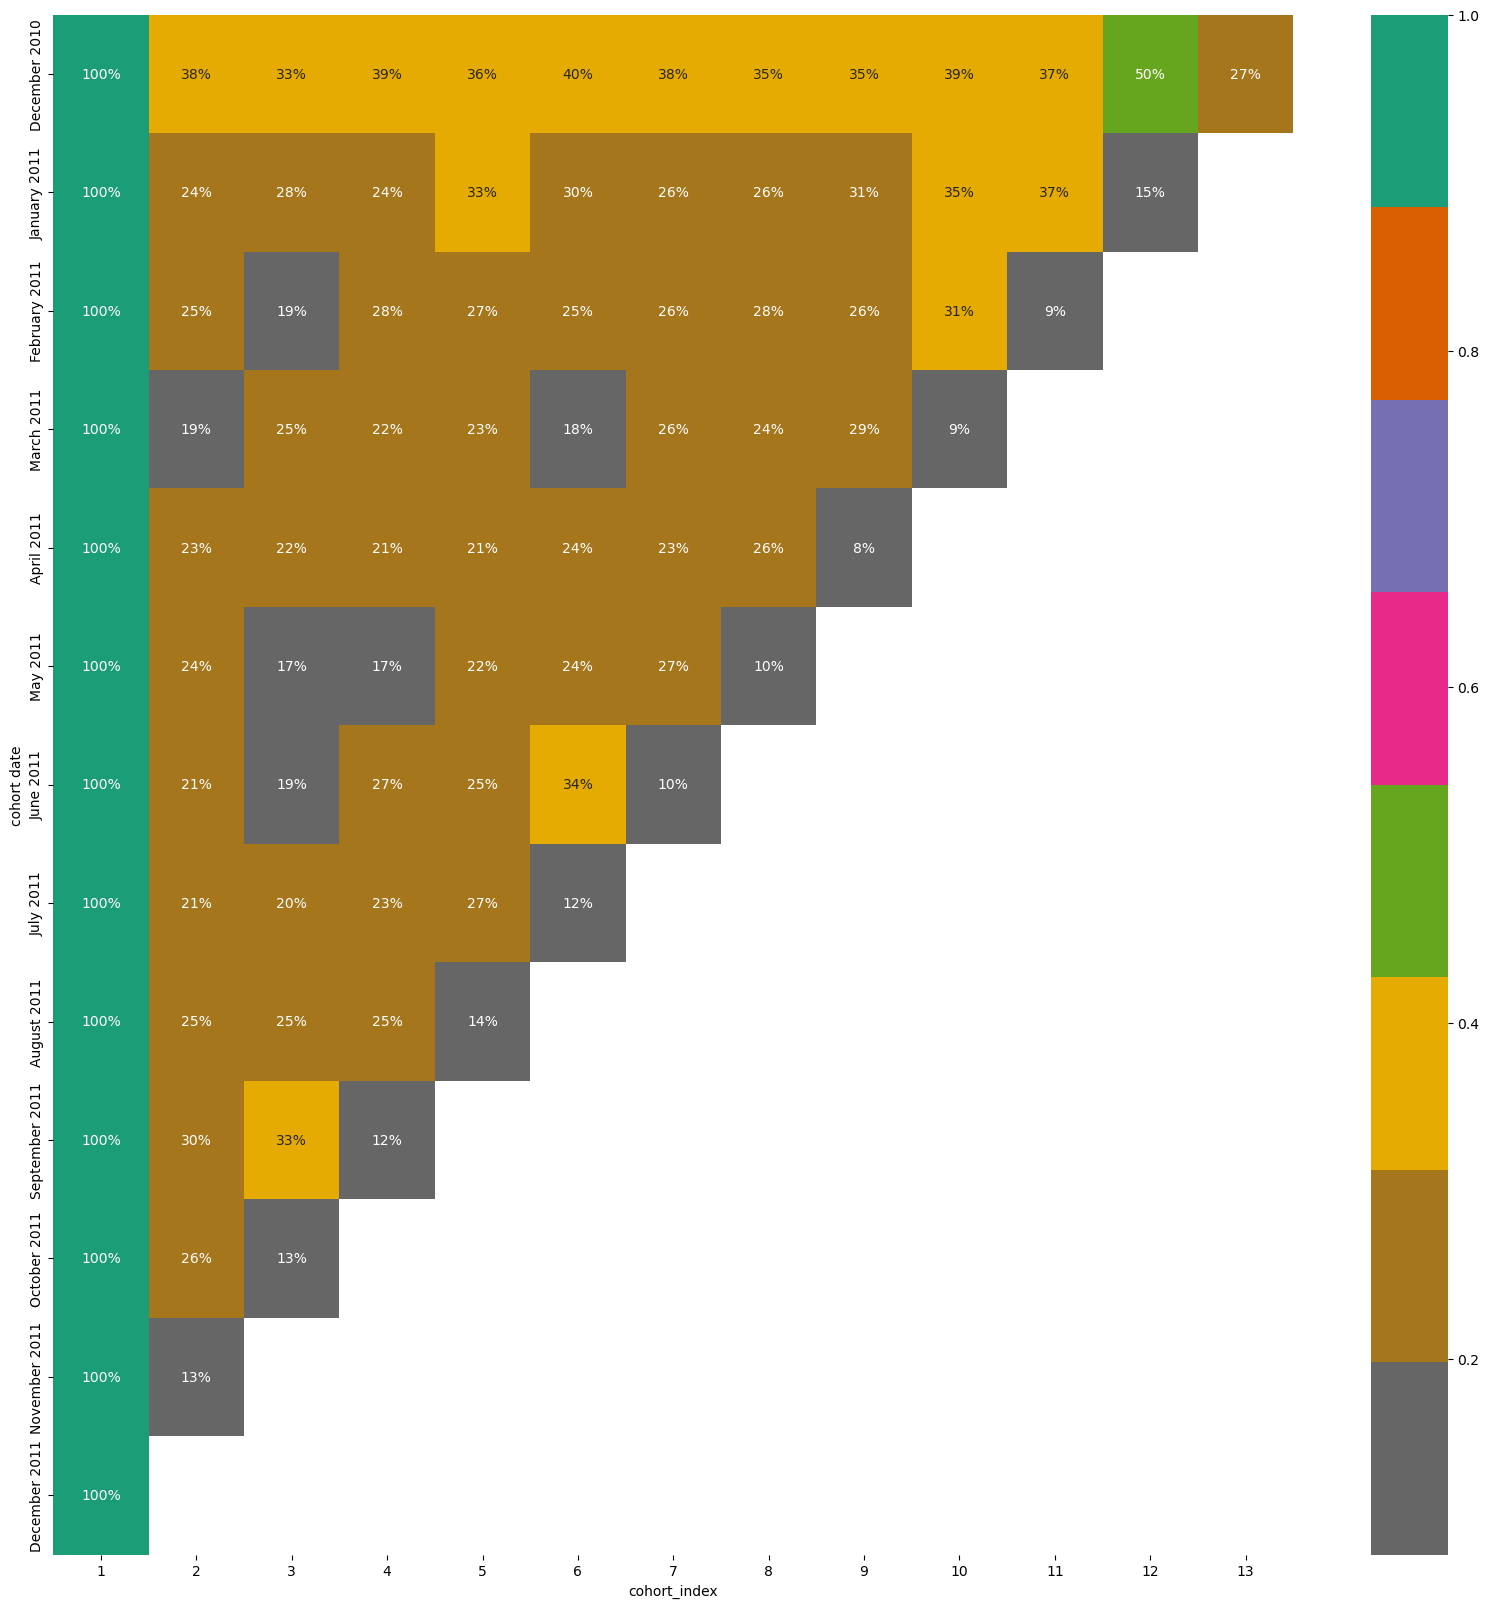

In [271]:
plt.figure(figsize = (20,20))
sns.heatmap(new_cohort_table, annot = True, cmap = "Dark2_r", fmt = ".0%");

THE INTERPRETATION OF THE PERCENTAGE COHORT INDEX


This image represents a normalized cohort analysis heatmap, where the values are shown as percentages relative to the first column. Each cell represents the percentage of the cohort (e.g., users, revenue, or engagement) retained or contributing at a specific time interval. Here’s an interpretation and insights based on the chart.

Interpretation for Management:
Cohort Retention Over Time:

The first column for each cohort is 100%, indicating the starting value for that cohort.
As you move right across the columns, percentages decrease, representing drop-offs in retention or contributions over time.
Trends Across Cohorts:

Earlier cohorts (e.g., December 2010 and January 2011) tend to have higher retention in later months compared to newer cohorts.
Newer cohorts (e.g., July 2011 onwards) show a sharper decline, indicating challenges in retaining or engaging users over time.
Variations in Retention Patterns:

Some cohorts (e.g., February 2011) maintain relatively consistent percentages across more periods compared to others, suggesting potentially better engagement or product-market fit during that time.
October 2011 has a slight bump in retention around the 5th period (34%), which might indicate a campaign or feature that re-engaged users.
Key Observations:
Strong Initial Engagement:

All cohorts start with 100% in the first period, which is expected, as this represents the full base at the start.
Drop-off Trends:

Retention generally decreases steeply in the first few periods (e.g., within 1–3 intervals). For example:
The December 2010 cohort drops to 38% by the 2nd interval.
The May 2011 cohort drops to 24% by the 2nd interval.
Inconsistent Retention Success:

Certain cohorts (e.g., October 2011 with 34% retention at the 5th interval) indicate isolated improvements, suggesting opportunities for analysis of what worked during those periods.
Declining Retention in Later Cohorts:

Newer cohorts (e.g., September 2011 to December 2011) show significantly lower retention levels, especially beyond the 3rd interval. This might indicate issues with user engagement, changes in product strategy, or external competition during those periods.
Recommendations for Management:
Focus on Retention Strategies:

Since most cohorts show a steep drop in retention after the 1st period, consider improving the user experience or offering incentives to retain users beyond the initial engagement phase.
Analyze Successful Cohorts:

Investigate what worked for cohorts like February 2011 or October 2011, which show relatively better retention trends. These insights can guide strategies for replicating success.
Target Declining Cohorts:

Address the reasons for sharp declines in later cohorts (e.g., July 2011 onwards). This may involve reevaluating user acquisition methods, onboarding experiences, or customer support.
Monitor and Iterate Campaigns:

Campaigns or features introduced around October 2011 (showing a retention bump at the 5th interval) should be analyzed and refined for future applications.
Track Long-Term Retention:

Extend cohort tracking beyond the visible intervals for insights into long-term retention patterns, especially for earlier cohorts like December 2010.
This analysis reveals retention challenges and areas for improvement. By focusing on what works and addressing weak points, management can improve user engagement and retention outcomes over time. Would you like a detailed report or further breakdowns on specific cohorts?















QUANTITY BOUGHT

In [277]:
quantity_bought = df.groupby(["cohort date", "cohort_index"])["Quantity"].sum().reset_index()

In [279]:
quantity_bought

,cohort date,cohort_index,Quantity
0,2010-12-01,1,1350834
1,2010-12-01,2,546873
2,2010-12-01,3,462374
3,2010-12-01,4,613244
4,2010-12-01,5,510943
...,...,...,...
86,2011-10-01,2,181888
87,2011-10-01,3,44776
88,2011-11-01,1,574330
89,2011-11-01,2,56021


In [287]:
quantity_table = quantity_bought.pivot(index = "cohort date", columns = ["cohort_index"], values = "Quantity")
quantity_table.index = quantity_table.index.strftime("%B %Y")

In [289]:
quantity_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort date,,,,,,,,,,,,,
December 2010,1350834.0,546873.0,462374.0,613244.0,510943.0,636443.0,597676.0,604504.0,600481.0,757806.0,725896.0,1165046.0,375469.0
January 2011,559013.0,121074.0,155931.0,120023.0,194675.0,166585.0,144835.0,149848.0,200661.0,258400.0,330607.0,76504.0,NaN
February 2011,450020.0,74008.0,98850.0,122918.0,111386.0,104214.0,108442.0,135276.0,151180.0,145405.0,21787.0,NaN,NaN
March 2011,563434.0,74215.0,125519.0,119480.0,122078.0,107554.0,139852.0,182259.0,212009.0,49685.0,NaN,NaN,NaN
April 2011,371021.0,71541.0,66410.0,65115.0,70639.0,105065.0,97319.0,110572.0,27119.0,NaN,NaN,NaN,NaN
May 2011,308885.0,55453.0,44637.0,45690.0,76473.0,118534.0,97156.0,41183.0,NaN,NaN,NaN,NaN,NaN
June 2011,285867.0,47847.0,35516.0,76483.0,88504.0,127400.0,31264.0,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,254889.0,25983.0,68721.0,69466.0,91529.0,26831.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,243542.0,80156.0,144849.0,141888.0,45405.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


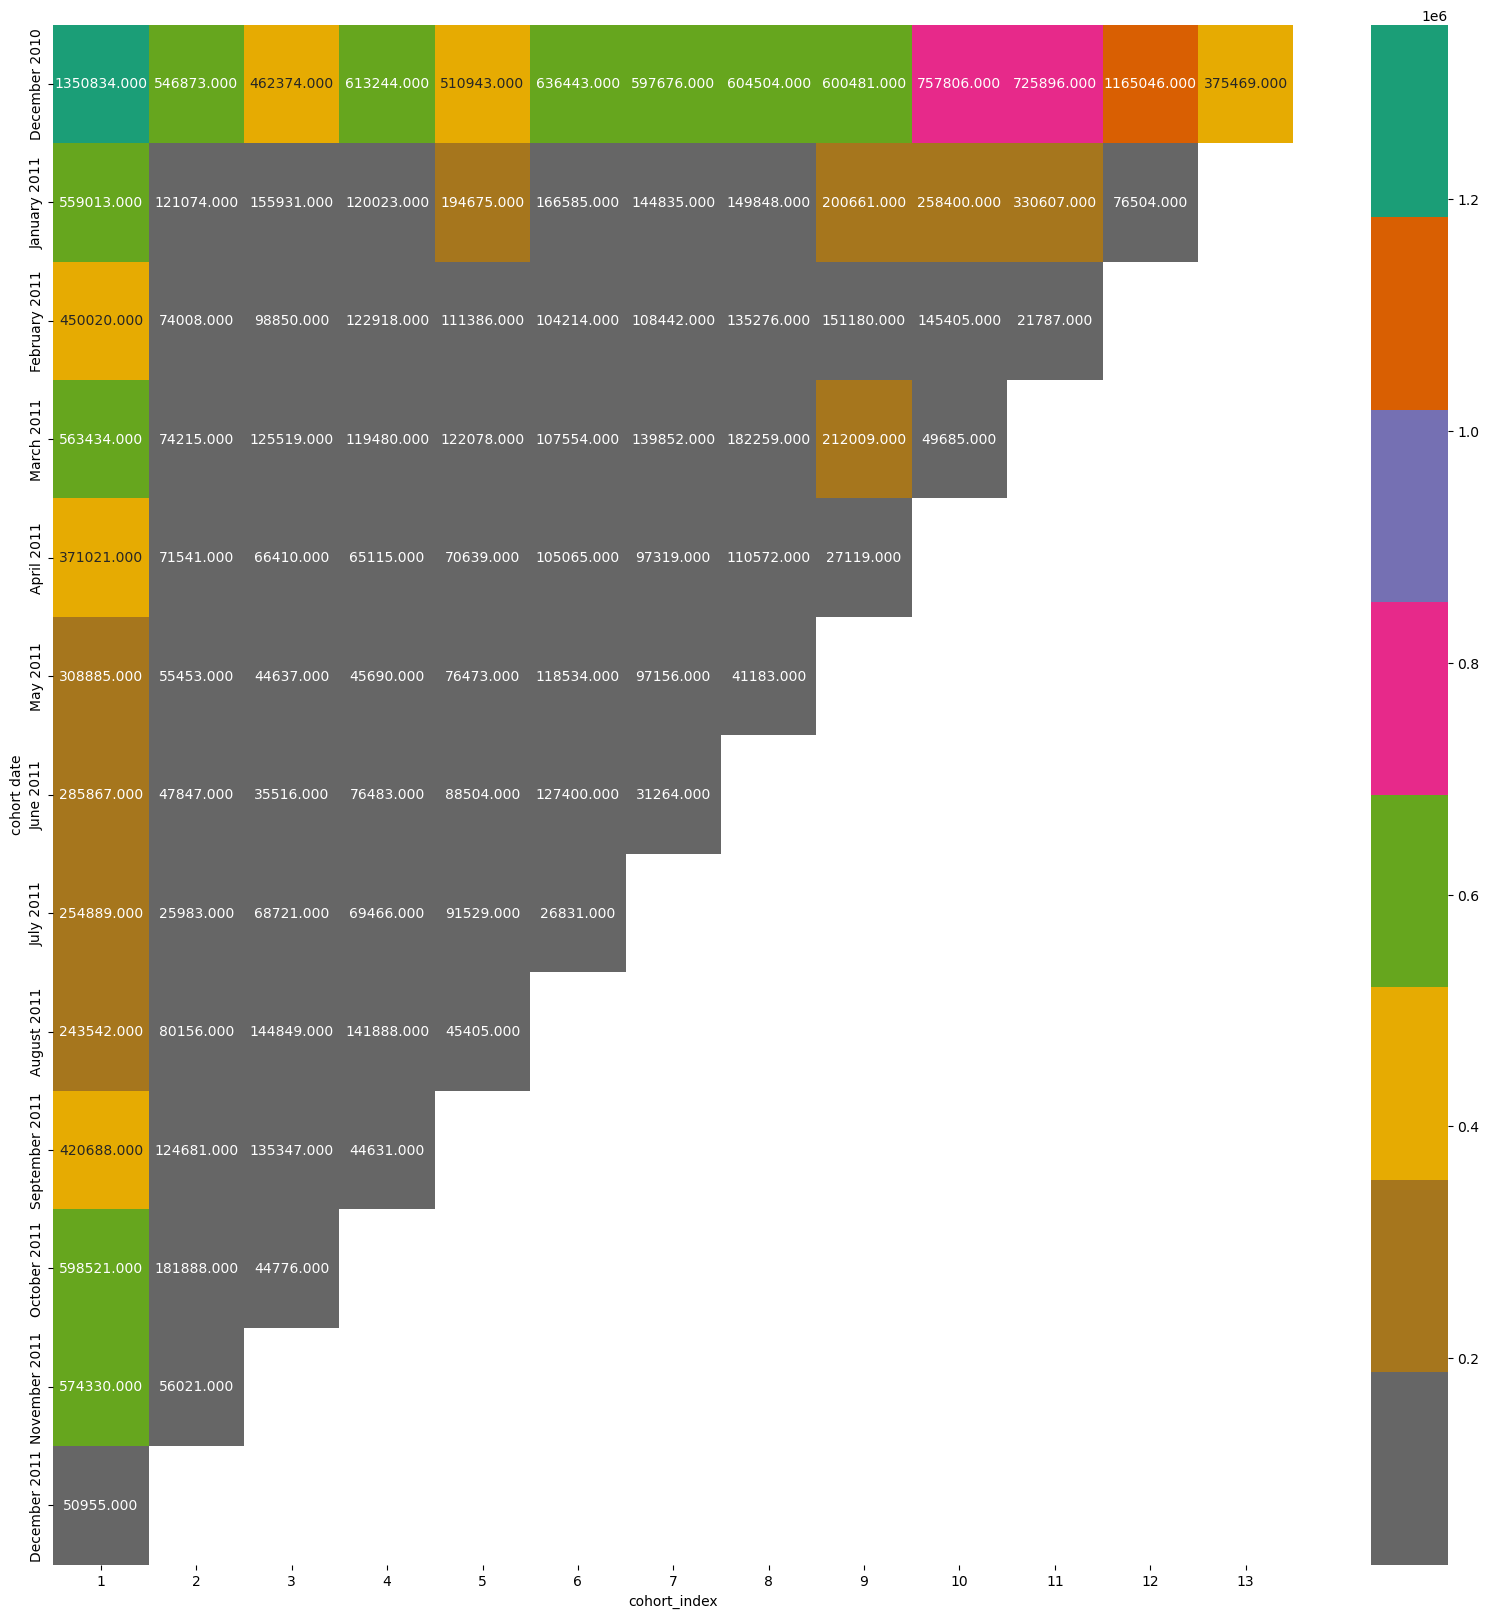

In [293]:
plt.figure(figsize = (20,20))
sns.heatmap(quantity_table, annot = True, cmap = "Dark2_r", fmt = ".3f");

In [295]:
quantity_bought = df.groupby(["cohort date", "cohort_index"])["Quantity"].mean().reset_index()

In [297]:
quantity_table = quantity_bought.pivot(index = "cohort date", columns = ["cohort_index"], values = "Quantity")
quantity_table.index = quantity_table.index.strftime("%B %Y")


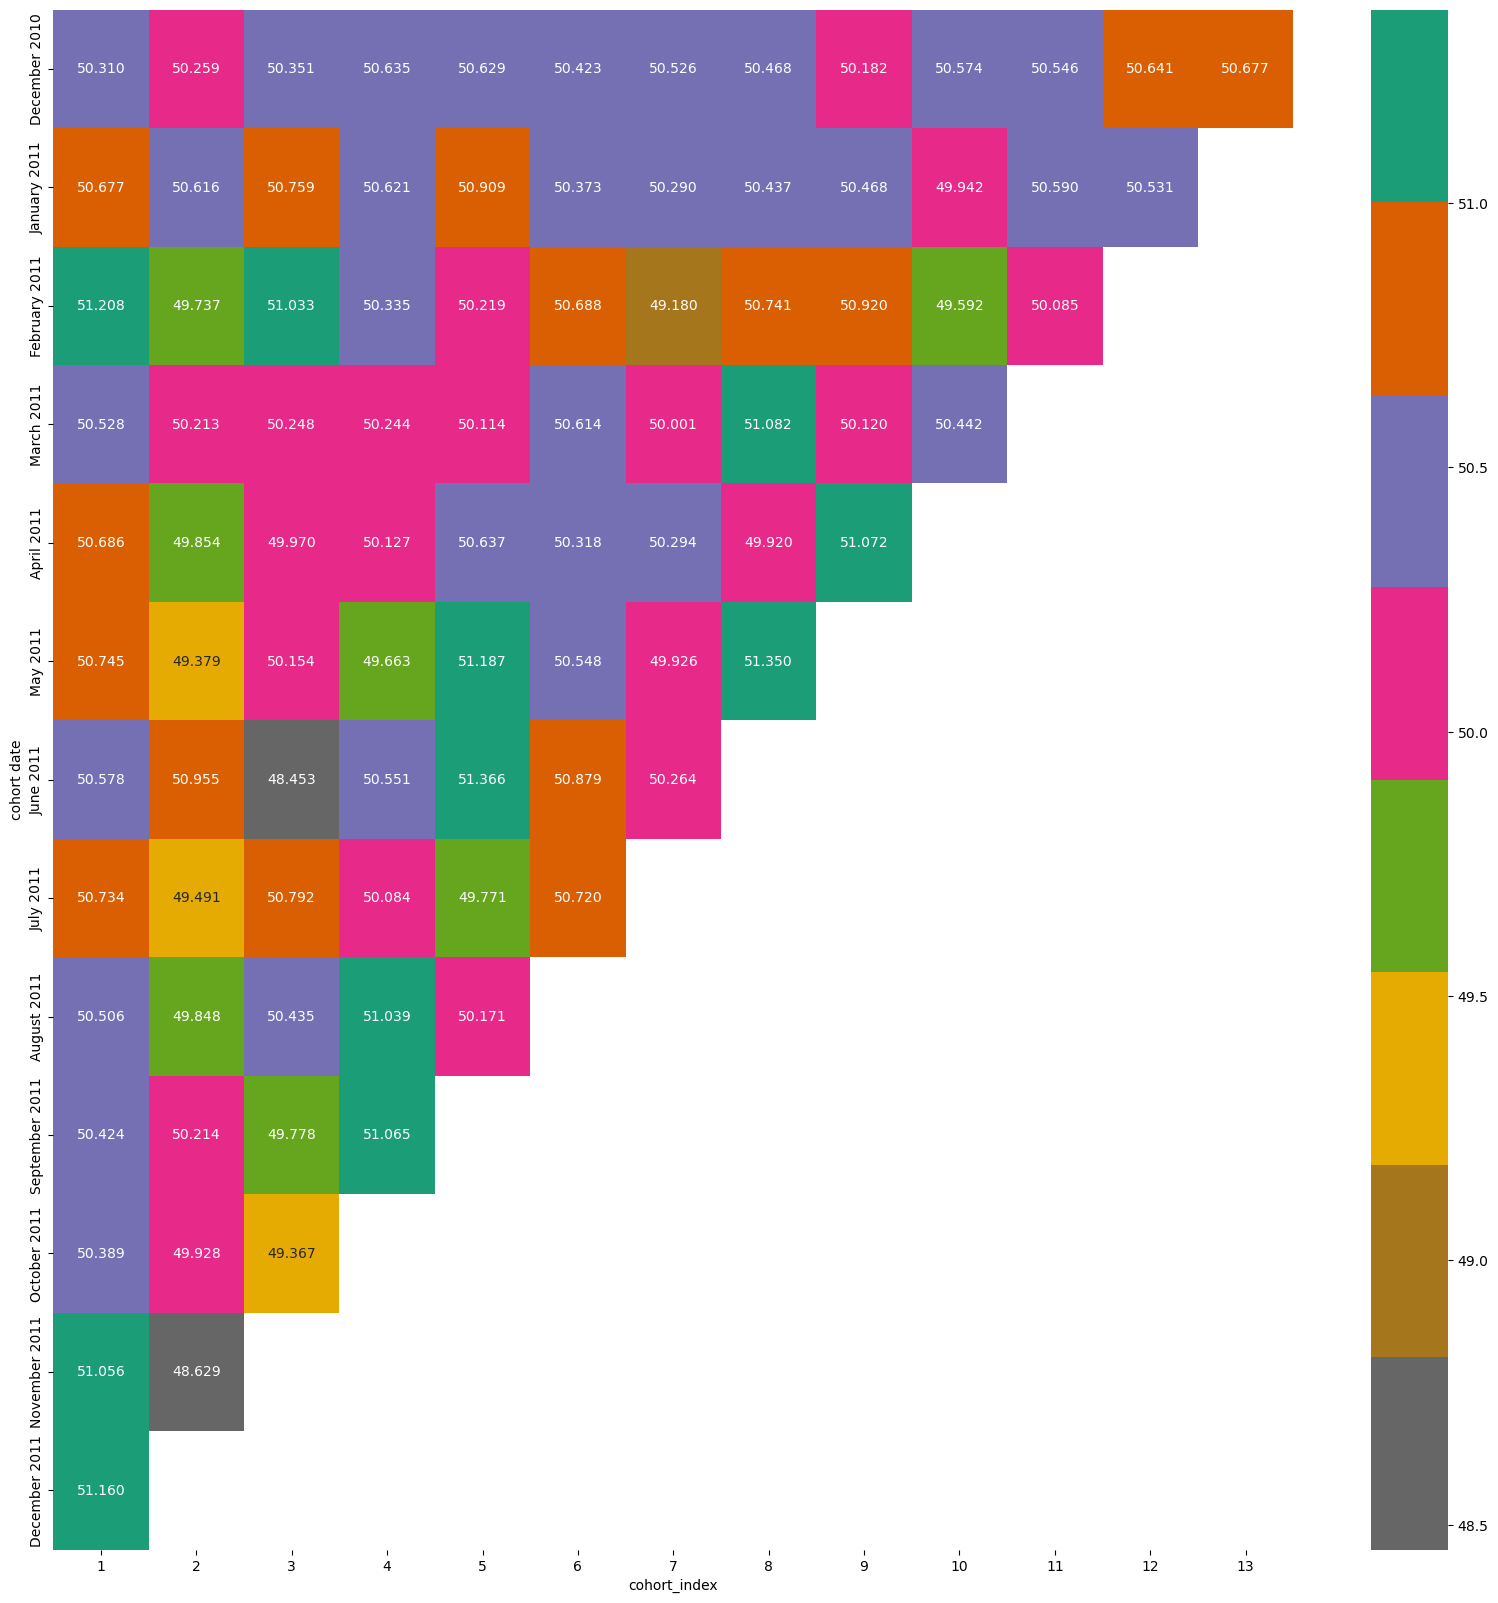

In [299]:
plt.figure(figsize = (20,20))
sns.heatmap(quantity_table, annot = True, cmap = "Dark2_r", fmt = ".3f");

Observations

Although there is significant drop in customer retention after their first month as observed on the previous chart, the average quantity bought is not experiencing much fluctuations. Meaning there is possibiity that a few customers tends to puchase alot of product, therefore maintaining the average value

In [338]:
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler

scaler = MinMaxScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(results),index=results.index,columns=results.columns)
print(x_scaled.describe())
print(x_scaled.head())

         TotalSales    OrderCount  AvgOrderValue
count  84912.000000  84912.000000   84912.000000
mean       0.014267      0.011737       0.255576
std        0.029919      0.030493       0.155533
min        0.000000      0.000000       0.000000
25%        0.003228      0.000000       0.149668
50%        0.007878      0.006192       0.239271
75%        0.016411      0.012384       0.330730
max        1.000000      1.000000       1.000000
                    TotalSales  OrderCount  AvgOrderValue
Country CustomerID                                       
Algeria 12347.0       0.010872    0.006192       0.310608
        12348.0       0.011315    0.000000       0.970189
        12349.0       0.003556    0.006192       0.101537
        12350.0       0.001665    0.000000       0.142724
        12352.0       0.007664    0.003096       0.328475


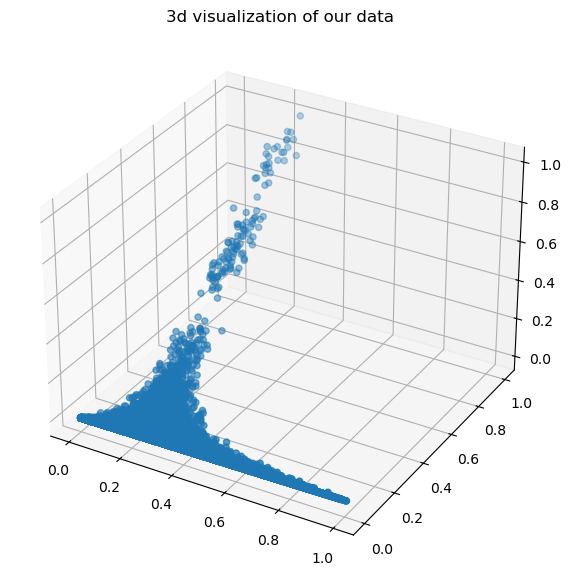

In [340]:
#plotting new data points
y=x_scaled['TotalSales']
x=x_scaled['AvgOrderValue']
z=x_scaled['OrderCount']
cmap = "Accent"
fig = plt.figure(figsize=(10,7))
ax=fig.add_subplot(111,projection="3d")
ax.scatter(x,y,z,marker="o",cmap=cmap)
ax.set_title("3d visualization of our data");

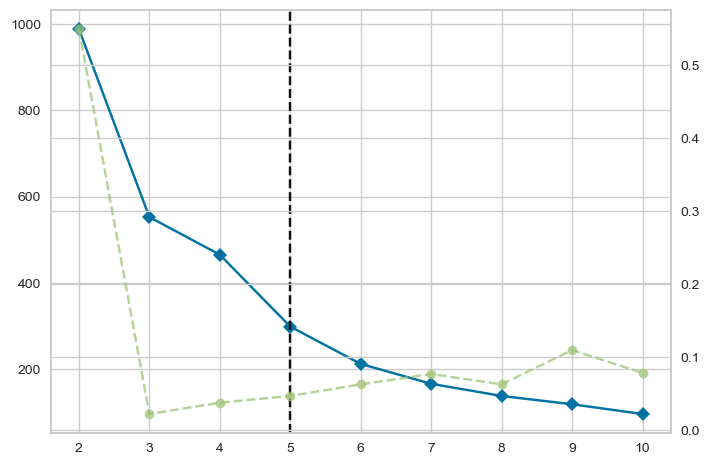

In [342]:
#importing clustering algo, silheoute score & kelbow visualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

#using the k elbow method to figure the appropriate number of clusters
elbow_k = KElbowVisualizer(estimator=KMeans())
elbow_k.fit(x_scaled);

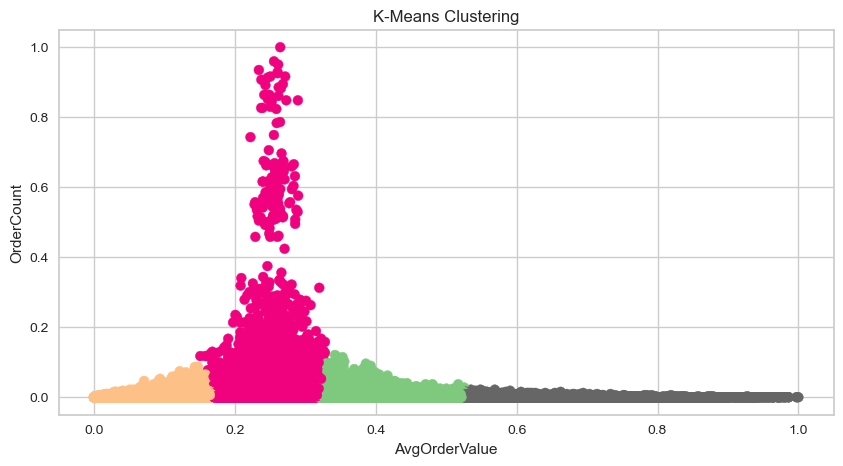

Silhouette Score: 0.9339


In [344]:
#applying kmeans clustering algorith
# K-means clustering
n_clusters = 4
cluster = KMeans(n_clusters=n_clusters)
cluster.fit(x_scaled)

# Add cluster labels to the data
x_scaled["Cluster"] = cluster.labels_

# Visualize the clusters
plt.figure(figsize=(10, 5))
plt.scatter(
    x_scaled["AvgOrderValue"],
    x_scaled["OrderCount"],
    c=x_scaled["Cluster"],
    s=50,
    cmap='Accent',
)
plt.title("K-Means Clustering")
plt.xlabel("AvgOrderValue")
plt.ylabel("OrderCount")
plt.legend()
plt.show()

# Calculate the silhouette score
silhouette_score = silhouette_score(x_scaled,
    x_scaled["Cluster"], metric="euclidean")
print(f"Silhouette Score: {silhouette_score:.4f}");

OBSERVATIONS AND NARRATION

Observation:
The scatter plot represents K-Means clustering results, where customer data is grouped into distinct clusters based on their Average Order Value (AvgOrderValue) and Order Count. The data points are segmented into clearly defined groups, represented by different colors.

Cluster Characteristics:

One prominent cluster (pink) contains a significant concentration of customers with low Average Order Value and relatively higher Order Count. This might represent customers who make frequent, low-value purchases.
Smaller clusters (e.g., orange, green, gray) show groups of customers with varying characteristics, such as higher average order values but lower order counts.
The dispersion suggests the existence of high-value customers who make fewer purchases and low-value customers who purchase more frequently.
Customer Segmentation:

Customers have been successfully segmented, providing an opportunity for targeted marketing strategies.
High-order-frequency, low-value customers (pink cluster) might benefit from loyalty programs or bundling offers to increase their average order value.
High-value, low-frequency customers (gray cluster) might represent premium customers and could benefit from personalized offers or exclusive services.
Narrative for Management:
The clustering analysis highlights distinct customer groups based on their purchase behavior, offering actionable insights:

The largest cluster represents customers with frequent but low-value purchases. To maximize revenue, strategies such as bundling low-value products or introducing loyalty incentives could encourage higher spending per order.
Smaller clusters indicate high-value but infrequent customers. Personalized engagement, such as tailored discounts or premium services, could boost retention and increase purchase frequency.
By focusing marketing efforts on these clusters, the organization can create targeted campaigns that align with specific customer behaviors, improving overall customer satisfaction and revenue generation.
Recommendations:
Focus on increasing the average order value for the largest customer group (pink cluster).
Develop retention strategies for premium customers (gray cluster) with high potential lifetime value.
Use cluster insights to design customized promotional campaigns to maximize ROI.


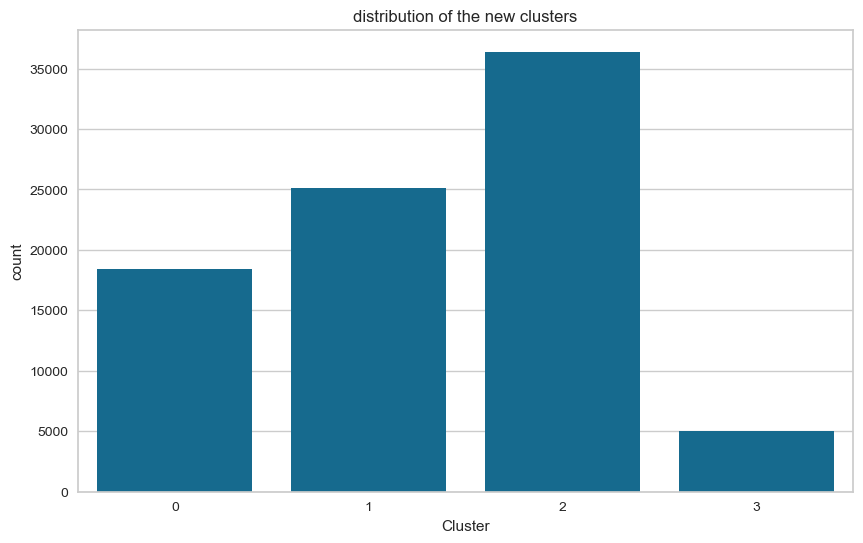

In [349]:
#distribution of cluster
plt.figure(figsize=(10,6))
sns.countplot(x = x_scaled.Cluster)
plt.title("distribution of the new clusters");

OBSERVATIONS AND NARRATIONS

Observation:
The chart illustrates the distribution of customers across the newly formed clusters. Each bar represents the number of customers within a specific cluster, highlighting the following insights:

Cluster Distribution:

Cluster 2 is the largest group, containing the majority of customers (over 35,000). This suggests a dominant customer behavior or profile in your dataset.
Cluster 1 follows, with a slightly smaller but significant number of customers (~25,000).
Cluster 0 has fewer customers (~15,000), representing a smaller but meaningful segment.
Cluster 3 is the smallest group (~5,000), indicating a niche segment of customers.
Customer Segmentation:

The uneven distribution suggests the presence of diverse customer behaviors, with some groups being significantly larger than others.
The smallest cluster (Cluster 3) likely represents a specialized or distinct group of customers that could have unique value or engagement needs.
Narrative for Management:
The segmentation results reveal distinct customer groups with varying sizes, enabling the organization to tailor its strategies accordingly:

Largest Segment (Cluster 2):

This group represents the bulk of the customer base. Efforts should focus on maintaining engagement and retention by offering appealing, scalable strategies (e.g., broad-based discounts, loyalty programs).
Second Largest Segment (Cluster 1):

This group is also substantial and likely exhibits behaviors slightly different from Cluster 2. Analyzing their unique traits can uncover opportunities to further personalize marketing campaigns.
Smaller Segments (Clusters 0 and 3):

Cluster 0, while smaller, represents a meaningful segment that could benefit from targeted initiatives to encourage growth.
Cluster 3, the smallest, might consist of high-value or niche customers. Personalized services, VIP programs, or premium product offerings could be effective here.
Recommendations:
Conduct further analysis of the largest cluster (Cluster 2) to understand its behavior and identify key drivers of customer satisfaction.
Design specific marketing strategies for the smaller clusters (Clusters 0 and 3) to maximize their value and growth potential.
Utilize these clusters for focused engagement strategies that align with customer needs and behaviors, improving ROI and customer satisfaction.

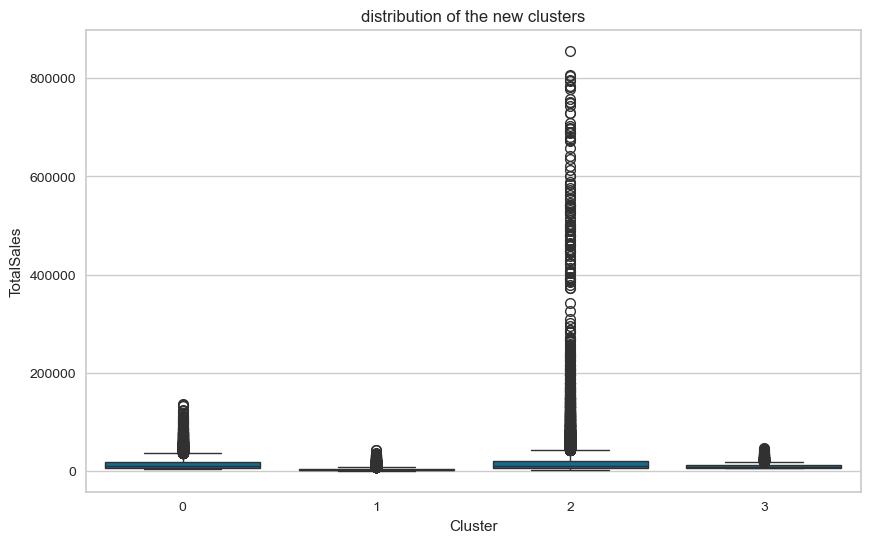

In [354]:
#distribution of cluster
plt.figure(figsize=(10,6))
sns.boxplot(x = x_scaled.Cluster,y="TotalSales",data=results)
plt.title("distribution of the new clusters");

OBSERVATIONS AND NARRATIONS


Observations:
The boxplot shows the distribution of Total Sales across different customer clusters. Here are the key takeaways:

Cluster 2 (Dominant Segment):

Cluster 2 has the highest number of outliers, with Total Sales values extending far beyond the other clusters.
This indicates the presence of high-value customers in this group who contribute significantly to overall revenue.
The range of Total Sales in Cluster 2 is wider than other clusters, reflecting diverse purchasing behaviors.
Clusters 0, 1, and 3:

These clusters have much lower Total Sales distributions compared to Cluster 2.
Clusters 0 and 3 show limited variability in Total Sales, suggesting these customers are more uniform in spending behavior.
Cluster 1 has slightly more variability than Clusters 0 and 3 but still lacks the extreme outliers observed in Cluster 2.
Outliers:

Outliers in Cluster 2 represent customers with extraordinarily high sales contributions. These customers likely represent a critical segment for revenue generation.
Narrative for Management:
The clustering analysis highlights distinct customer behaviors in terms of Total Sales, revealing important insights for strategic decision-making:

Cluster 2 (High-Value and High-Variability):

This cluster includes the most valuable customers, with some generating exceptionally high sales.
These customers should be prioritized for retention strategies, personalized offers, and premium services to maximize their lifetime value.
The wide variability in spending behavior suggests the need for sub-segmentation within Cluster 2 to better address diverse customer needs.
Clusters 0, 1, and 3 (Low to Medium Value):

These clusters have relatively lower contributions to Total Sales.
Clusters 0 and 3 exhibit uniform spending patterns, indicating potential for growth through targeted promotions or cross-selling.
Cluster 1 shows moderate variability, representing a mid-tier segment that could be nurtured into higher-value customers.
Outliers:

The high-value outliers in Cluster 2 warrant special attention as they are key revenue drivers. Consider exclusive engagement programs for this segment to build loyalty and increase their spending.
Recommendations:
Focus on Cluster 2:

Analyze the characteristics of high-value customers in this cluster.
Develop tailored retention and upselling strategies, including personalized marketing and loyalty programs.
Grow Revenue from Lower-Tier Clusters:

Use promotional offers and targeted campaigns to increase spending among Clusters 0, 1, and 3.
Consider incentives to encourage repeat purchases and larger order sizes.
Investigate Outliers:

Profile the high-value outliers in Cluster 2 to identify common traits.
Develop specific strategies to attract and retain similar high-value customers.
By leveraging these insights, the organization can optimize resource allocation, improve customer engagement, and maximize revenue growth.








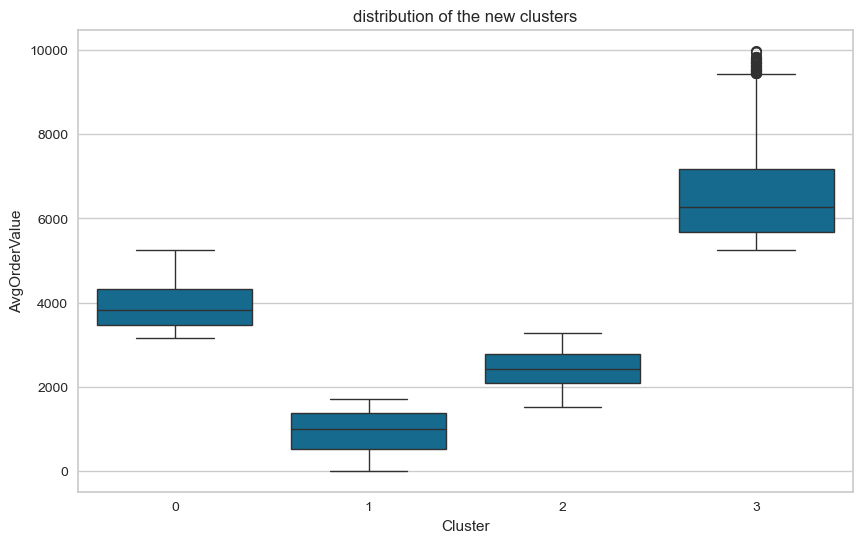

In [359]:
#distribution of cluster
plt.figure(figsize=(10,6))
sns.boxplot(x = x_scaled.Cluster,y="AvgOrderValue",data=results)
plt.title("distribution of the new clusters");

OBSERVATIONS AND NARRATIONS

Observations:
The boxplot illustrates the distribution of Average Order Value (AvgOrderValue) across different customer clusters. Key insights include:

Cluster 3:

Customers in Cluster 3 have the highest AvgOrderValue, with a median value significantly above all other clusters.
There are some outliers with exceptionally high AvgOrderValue, indicating a small group of very high-value customers.
This cluster likely represents premium customers or big spenders and contributes substantially to revenue despite being smaller in size.
Cluster 0:

Cluster 0 has the second-highest AvgOrderValue, with a median value close to 4000.
This cluster shows a moderate range, suggesting consistent spending patterns without extreme outliers.
Cluster 2:

Cluster 2 has a relatively lower AvgOrderValue compared to Clusters 0 and 3, with a median value around 2000.
The range is slightly narrower, indicating a group of customers with more uniform spending behavior.
Cluster 1:

Cluster 1 has the lowest AvgOrderValue, with a median below 2000.
The limited range indicates minimal variation in spending behavior for this group, potentially representing price-sensitive or low-value customers.
Narration for Management:
The distribution of AvgOrderValue across clusters provides clear segmentation of customer behavior:

High-Value Segment (Cluster 3):

This cluster includes the organization's most valuable customers, who make large purchases.
These customers should be prioritized with personalized experiences, premium product offerings, and exclusive loyalty rewards to retain them and further maximize their lifetime value.
Mid-Tier Segment (Cluster 0):

Customers in Cluster 0 represent a mid-tier group with consistent spending habits.
Focus on strategies like upselling and bundling to increase their AvgOrderValue while maintaining engagement.
Moderate-Value Segment (Cluster 2):

Cluster 2 is composed of customers with moderate AvgOrderValue and uniform behavior.
Consider targeted promotions and incentives to encourage slightly higher spending from this group.
Low-Value Segment (Cluster 1):

Cluster 1 contains customers with the lowest AvgOrderValue and limited variability.
Explore entry-level loyalty programs or discount-based campaigns to nurture and grow this segment.
Recommendations:
Target High-Value Customers (Cluster 3):

Leverage CRM tools to track and provide tailored engagement for these premium customers.
Introduce VIP programs, personalized offers, and early access to products or services.
Upsell Mid-Tier Customers (Cluster 0):

Provide value-driven incentives such as bulk discounts, package deals, or upgrade offers.
Nurture Low-Value Customers (Cluster 1):

Implement strategies to increase their purchasing frequency or average order size.
Offer entry-level incentives to encourage these customers to transition into higher-value segments.
Monitor and Analyze Outliers:

Investigate the high-value outliers in Cluster 3 for opportunities to replicate their traits across other clusters.
These insights will help the organization allocate resources effectively and improve revenue generation by addressing customer behavior within each cluster. 






